# Examples of Basic ML Learning Tools

In [1]:
# The goal of this notebook is to look at just the ability of the seed number
# to determine the winner. One caveat here is that the model always should be
# correct when two teams of the same seed go head to head. I could fix it but
# it probably isn't worth the effort. The accuracies seem to be about 70% or 
# maybe 65% considering the imperfect data. I also broke the learning down by
# season just to see if we are potentially getting better at seeding teams. 

In [1]:
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

In [3]:
# UTILITY FUNCTIONS FOR PRE-PROCESSING AND 

# INPUT: Train Dataframe, Test Dataframe, list(column names for training),
# label_col - 'Winner', model - a machine learning model
# RETURNS: the accuracy of the predictions
def predict( train, test, feat_cols, label_col, model ):
    model.fit( train[feat_cols], train[label_col] )
    return model.score( test[feat_cols], test[label_col] )

# INPUT: All the Data, feat_cols - list(columns to train on),
# label_col - 'Winner', model - machine learning model
def test_model( data, feat_cols, label_col, model ):
    accs = []
    for i in range(10):
        train = data.sample( frac=.7 )
        test = data.drop( train.index )
        accs += [predict( train, test, feat_cols, label_col, model )]
    return sum(accs) / len(accs)

# MODELS FROM SKLEARN ################################################
models = {  'LogReg': LogisticRegression(),
            'DecisionTree': DecisionTreeClassifier( max_depth=5 ),
            'NaiveBayes': GaussianNB(),
            'NeuralNet': MLPClassifier(),
            'RandomForest': RandomForestClassifier(),
            'KNN': KNeighborsClassifier( 5 ),
            'SVC': SVC(),
            'BoostClassifier':AdaBoostClassifier() }

# THIS FUNCTION TESTS THE ACCURACY OF THE DATA ON ALL THE MODELS #####
def test_models( data, feat_cols, label_col ):
    for model in models.keys():
        accuracy = test_model( data, feat_cols, label_col, models[model] )
        print( model, ": ", accuracy )

# THIS FUNCTION TESTS AN ENSEMBLE ####################################
# JUST GIVE IT A LIST OF MODEL NAMES AND IT WILL TRAIN THEM ALL AND ##
# VOTE ON THEIR PREDICTIONS. THE FIRST MODEL IS THE TIE BREAKER ######
def test_ensemble( model_names, data, feat_cols, label_col ):
    estimators = []
    estimators.append( (model_names[0], models[model_names[0]]) )
    for name in model_names:
        estimators.append( (name + '1', models[name]) )
        estimators.append( (name + '2', models[name]) )
        
    ensemble = VotingClassifier( estimators=estimators, voting='hard' )
    accuracy = test_model( data, feat_cols, label_col, ensemble )
    print( 'Ensemble: ', accuracy )

# THIS FUNCTION NORMALIZES THE DATA FOR THE COLUMNS GIVEN ############
def normalize( data, col_names ):
    for col in col_names:
        data[col] = data[col] - data[col].min() # SUBTRACT THE MIN ###
        data[col] = data[col] / data[col].max() # DIVIDE BY THE MAX ##
    return data

# THIS IS A HELPER FUNCTION FOR THE SCRAMBLE_WINNER FUNCTION #########
# IT TAKES TWO HALVES OF THE DATA AND RENAMES THE COLUMNS APPROPRIATELY
def rename( half, rest, winner_name, loser_name, generic_name ):
    half = half.rename( index=str, columns={ winner_name: generic_name + '1', loser_name:  generic_name + '2'} )
    rest = rest.rename( index=str, columns={ loser_name:  generic_name + '1', winner_name: generic_name + '2'} )
    return half, rest

# THE DATA IS JUST THE DATA, THE RENAME RULES ARE EACH A SET OF 3 ####
# STRINGS - The columns names for the winner, loser, and the generic #
# name they will get after scrambling ################################
# FOR EXAMPLE: (WRPI, LRPI, RPI) => will rename WRPI and LRPI to #####
# RPI1 and RPI2 ######################################################
def scramble_winner( data, rename_rules ):
    half = data.sample( frac=.5 )
    rest = data.drop( half.index )
    half['Winner'] = 'A'
    rest['Winner'] = 'B'
    
    for rule in rename_rules:
        half, rest = rename( half, rest, rule[0], rule[1], rule[2] )
    
    return pandas.concat( [rest, half] )

All Data
LogReg :  0.718367346939
DecisionTree :  0.655782312925
NaiveBayes :  0.705442176871
NeuralNet :  0.707482993197
RandomForest :  0.668707482993
KNN :  0.662244897959
SVC :  0.702040816327
BoostClassifier :  0.693197278912
Ensemble:  0.713265306122



/home/jonandrewj/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2004 NeuralNet 0.6875
2005 KNN 0.71875
2006 LogReg 0.71875
2007 LogReg 0.828125
2008 LogReg 0.765625
2009 BoostClassifier 0.765625
2010 LogReg 0.703125
2011 NaiveBayes 0.671641791045
2012 DecisionTree 0.731343283582
2013 RandomForest 0.716417910448
2014 DecisionTree 0.671641791045
2015 LogReg 0.746268656716
2016 NaiveBayes 0.731343283582
2017 LogReg 0.761194029851

   LTeamID      POM1      POM2      RPI1      RPI2      SAG1      SAG2  \
0     1411  0.908163  0.858044  0.755245  0.708812  0.833876  0.825083   
1     1436  0.486395  0.006309  0.500000  0.003831  0.511401  0.003300   
5     1166  0.088435  0.154574  0.076923  0.164751  0.055375  0.155116   
7     1140  0.085034  0.069401  0.062937  0.103448  0.087948  0.072607   
9     1161  0.292517  0.022082  0.258741  0.042146  0.286645  0.029703   

   Season     Seed1     Seed2  WTeamID Winner  
0    2003  1.000000  1.000000     1421      B  
1    2003  1.000000  0.000000     1112      B  
5    2003  0.333333  0.666667     1141     

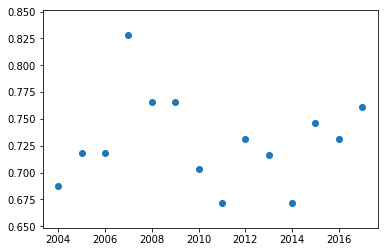

In [10]:
# SOME BASIC TESTING ON SEEDING DATA AND RPI RANKINGS ################
# IMPORT THE DATA ####################################################
data = pandas.read_csv( 'cleaned/TourneySeedsAndRankings.csv' )

# COLUMNS THAT I AM INTERESTED IN LEARNING ON ########################
cols = [ 'SAG', 'Seed', 'RPI', 'POM' ]

# SET UP THE RULES FOR RENAMING SO THAT THE WINNER DATA CAN BE #######
# SCRAMBLED ##########################################################
rules = []
for col in cols:
    rules.append( ('W' + col, 'L' + col, col) )

# SCRAMBLE THE WINNER FROM THE DATA ##################################
data = scramble_winner( data, rules )

# SET UP MY LABEL COLUMNS ############################################
label_cols = []
for name in cols:
    label_cols.append( name + '1' )
    label_cols.append( name + '2' )

# NORMALIZE MY DATA ##################################################
data = normalize(data, label_cols)
   
# PERFORM TESTS ON MY DATA ###########################################
print( 'All Data' )

# TEST ALL THE DATA FOR ALL THE MODELS AND THEN WITH AN ENSEMBLE #####
test_models( data, label_cols, 'Winner' )
test_ensemble( ['LogReg', 'NeuralNet', 'SVC'], data, label_cols, 'Winner' )
print()

# TEST TO SEE THE PREDICTION ACCURACY FOR EACH YEAR ##################
years = {}
for year in range(2004, 2018):
    train = data.loc[ data['Season'] < year ]
    test = data.loc[ data['Season'] == year ]
    results = {}
    for model_name in models.keys():
        acc = predict( train, test, label_cols, 'Winner', models[model_name])
        results[model_name] = acc
    best = max( results.keys(), key=(lambda k: results[k]) )
    print(year, best, results[best])
    years[year] = (best, results[best])
print()

# LOOK AT IF IT IS GETTING EASIER OR HARDER TO PREDICT THE RESULTS ###
import matplotlib.pyplot as plt
%matplotlib inline 
plt.scatter( [year for year in years.keys()], [years[year][1] for year in years.keys()] )
    
# PRINT THE DATA TO MAKE SURE IT ALL LOOKS RIGHT #####################
print(data.head())

In [6]:
# BASIC TESTING ON DIFFERENT TEAM STRENGTH RANKINGS ##############
# I THINK WE CAN ADD PRE-PROCESSING BUT THIS LOOKS DECENT FOR NOW...
data = pandas.read_csv( 'cleaned/TourneyResultsWithRankings.csv' )

# WHAT FEATURES ARE WE INTERESTED IN? ############################
systems = [ 'RPI', 'POM', 'MOR', 'RTH', 'WLK', 'DOL', 'COL', 'SAG' ]

# SET UP THE RULES FOR RENAMING SO THAT THE WINNER DATA CAN BE #######
# SCRAMBLED ##########################################################
rules = []
for col in systems:
    rules.append( ('W' + col, 'L' + col, col) )

# SCRAMBLE THE WINNER FROM THE DATA ##################################
data = scramble_winner( data, rules )

# SET UP MY LABEL COLUMNS ############################################
label_cols = []
for name in systems:
    label_cols.append( name + '1' )
    label_cols.append( name + '2' )
    
# NORMALIZE MY DATA ##################################################
data = normalize(data, label_cols)
    
# TEST THE DATA ######################################################
test_models( data, label_cols, 'Winner' )
test_ensemble( ['LogReg', 'NeuralNet', 'SVC'], data, label_cols, 'Winner' )
data.head()

LogReg :  0.709523809524
DecisionTree :  0.660204081633
NaiveBayes :  0.681292517007
NeuralNet :  0.710884353741
RandomForest :  0.671768707483
KNN :  0.68537414966
SVC :  0.69693877551
BoostClassifier :  0.688775510204
Ensemble:  0.728231292517


,COL1,COL2,DOL1,DOL2,LBIH,LBOB,LCNG,LDOK,LDUN,LMAS,...,WLK2,WMAS,WPGH,WPIG,WSE,WSEL,WTeamID,WWIL,WWOL,Winner
0,0.722603,0.800000,0.853047,0.859532,234.0,239.0,NaN,NaN,247.0,249.0,...,0.825175,265.0,NaN,NaN,210.0,233.0,1421,NaN,220,B
1,0.489726,0.003774,0.555556,0.003344,151.0,158.0,NaN,NaN,110.0,148.0,...,0.003497,3.0,NaN,NaN,2.0,2.0,1112,NaN,2,B
2,0.061644,0.139623,0.071685,0.157191,19.0,22.0,NaN,NaN,19.0,18.0,...,0.115385,40.0,NaN,NaN,44.0,34.0,1113,NaN,39,B
6,0.253425,0.037736,0.322581,0.026756,85.0,76.0,NaN,NaN,45.0,84.0,...,0.013986,10.0,NaN,NaN,12.0,8.0,1181,NaN,9,B
8,0.178082,0.052830,0.193548,0.036789,56.0,63.0,NaN,NaN,42.0,51.0,...,0.031469,11.0,NaN,NaN,16.0,10.0,1228,NaN,14,B


In [8]:
# BASIC TESTING ON SEEDING DATA ##################################
data = pandas.read_csv( 'cleaned/TourneyResultsWithSeeds.csv')

# WHAT FEATURES ARE WE INTERESTED IN? ############################
columns = [ 'Seed' ]

# SET UP THE RULES FOR RENAMING SO THAT THE WINNER DATA CAN BE #######
# SCRAMBLED ##########################################################
rules = []
for col in columns:
    rules.append( ('W' + col, 'L' + col, col) )

# SCRAMBLE THE WINNER FROM THE DATA ##################################
data = scramble_winner( data, rules )

# SET UP MY LABEL COLUMNS ############################################
label_cols = []
for name in columns:
    label_cols.append( name + '1' )
    label_cols.append( name + '2' )
    
# NORMALIZE MY DATA ##################################################
data = normalize(data, label_cols)
    
# TEST THE DATA ######################################################
test_models( data, label_cols, 'Winner' )
test_ensemble( ['LogReg', 'NeuralNet', 'SVC'], data, label_cols, 'Winner' )
data.head()

LogReg :  0.717952755906
DecisionTree :  0.702519685039
NaiveBayes :  0.711496062992
NeuralNet :  0.714330708661
RandomForest :  0.697637795276
KNN :  0.67905511811
SVC :  0.69905511811
BoostClassifier :  0.709763779528
Ensemble:  0.705039370079


,BetterSeedWon,LScore,LTeamID,Season,Seed1,Seed2,SeedDiff,WScore,WTeamID,Winner
4,True,46,1396,1985,0.466667,0.000000,7,63,1207,B
6,True,54,1210,1985,0.066667,0.000000,1,60,1207,B
8,False,55,1425,1985,0.466667,0.533333,-1,58,1229,B
10,False,58,1449,1985,0.266667,0.733333,-7,66,1246,B
11,False,61,1424,1985,0.200000,0.733333,-8,64,1246,B
